### 5.1 なぜインスタンスごとの異質性をとらえる必要があるのか

- インスタンスごとに、もしくは属性ごとに興味のある特徴量との間で交互作用がある場合、そこから生じる異質性を分析するにはPartial Dependenceでは限界があり、*Individual Conditional Expectation(ICE)* を見る必要がある
- PDは、個別のICEを全てのインスタンスで平均するものなので、実際にはPDを計算するときには暗黙のうちにICEも計算している。

In [3]:
import sys
import warnings 
from dataclasses import dataclass
from typing import Any
from __future__ import annotations

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib 

sys.path.append("..")
from mli.visualize import get_visualization_setting

np.random.seed(42)
pd.options.display.float_format = "{:.2f}".format
sns.set(**get_visualization_setting())
warnings.simplefilter("ignore")





In [4]:
from sklearn.model_selection import train_test_split

def generate_simulation_data():
    """シミュレーションデータを生成し、訓練データとテストデータに分割する"""

    # シミュレーションデータの設定
    N = 1000

    # X0とX1は一様分布から生成

    x0 = np.random.uniform(-1, 1, N)
    x1 = np.random.uniform(-1, 1, N)
    x2 = np.random.binomial(1, 0.5, N)

    epsilon = np.random.uniform(0, 0.1, N)
    # np.arrayを３つ縦ベクトルとして結合、bind_cols()に近い？
    X = np.column_stack((x0, x1, x2))
    
    # 線形和でyを生成
    y = x0 - 5 * x1 + 10 * x1 * x2 + epsilon
    
    # train_test_split
    return train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train, X_test, y_train, y_test = generate_simulation_data()


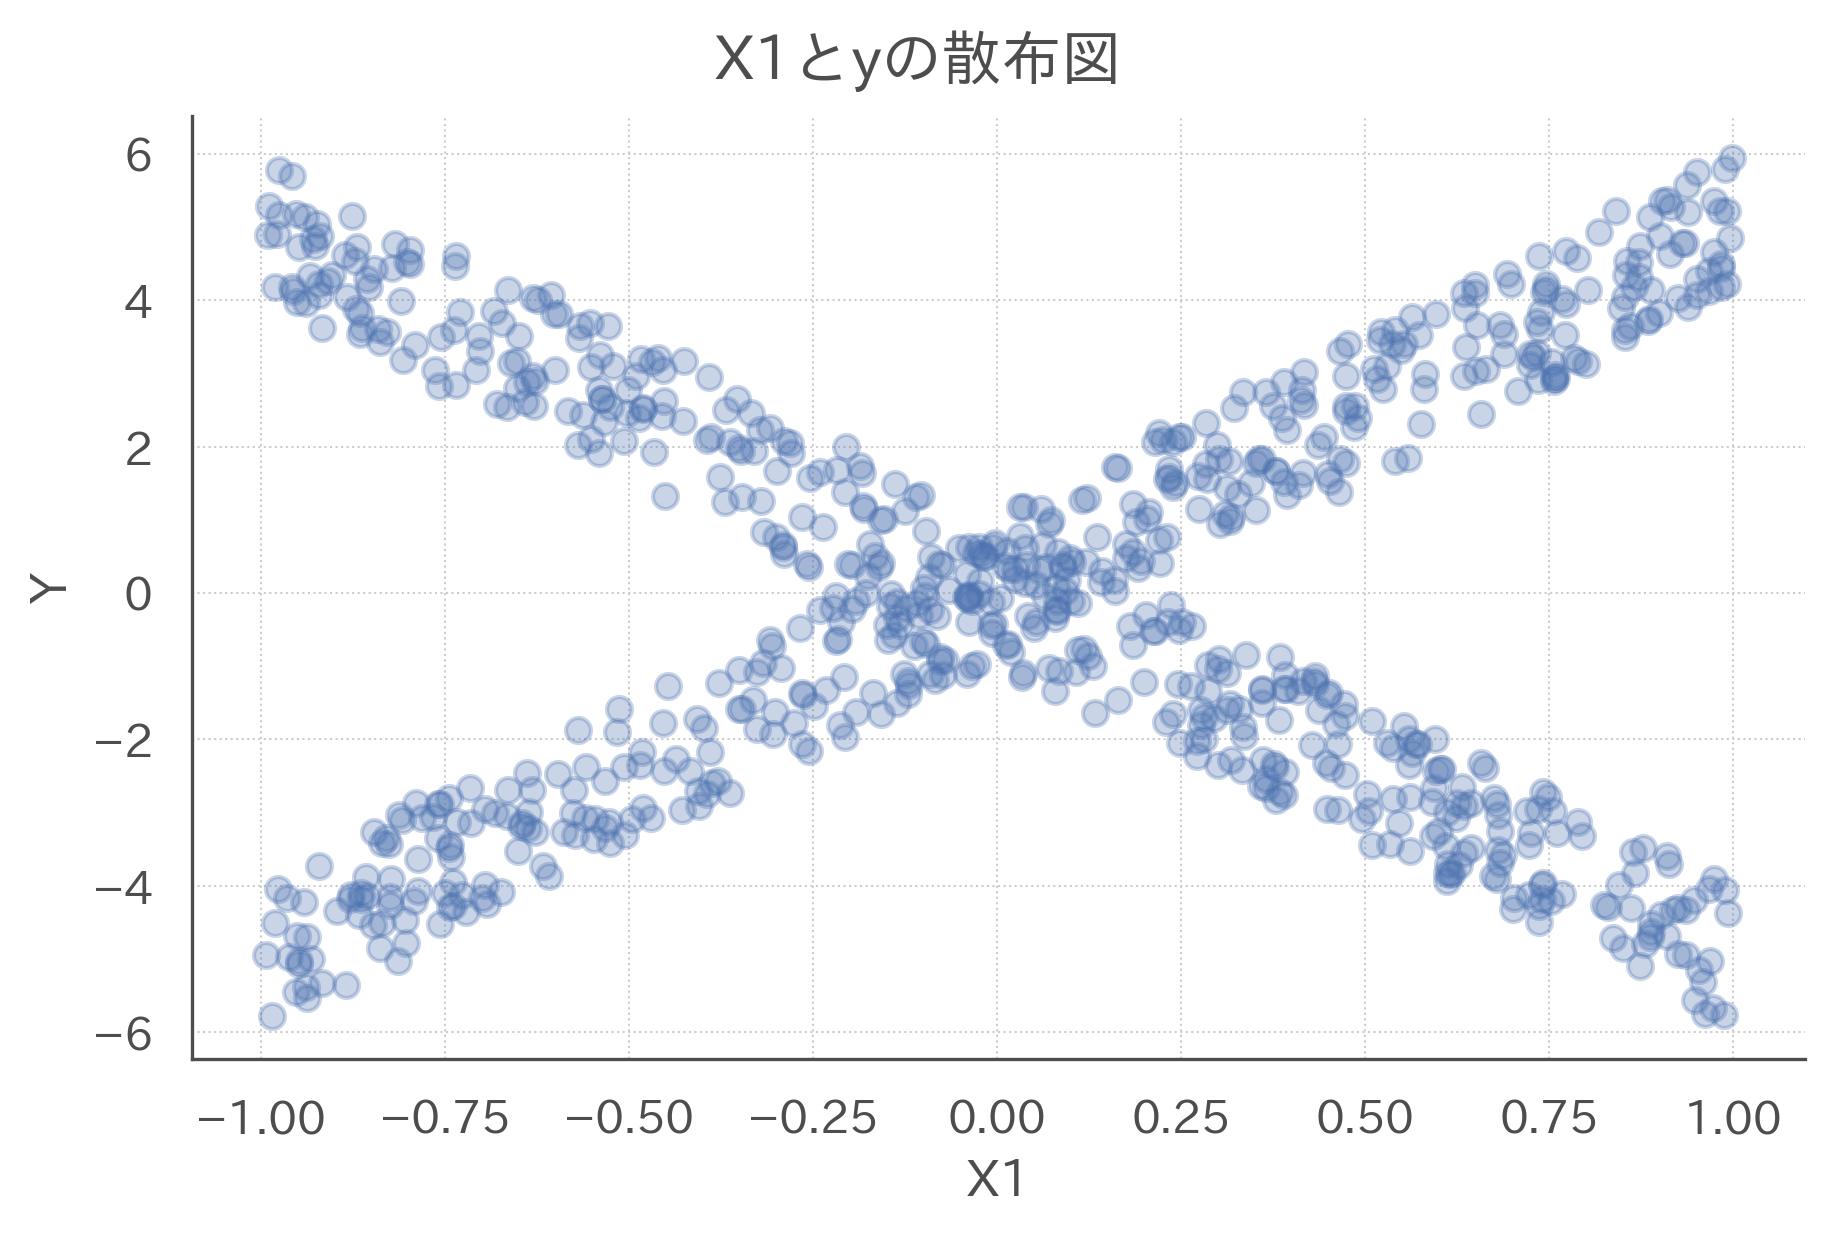

In [5]:
def plot_scatter(x, y, title = None, xlabel = None, ylabel = None):
    """scatter plotを作成"""
    fig, ax = plt.subplots()
    ax.scatter(x, y, alpha = 0.3)
    ax.set(xlabel = xlabel, ylabel = ylabel)
    fig.suptitle(title)

    fig.show()


plot_scatter(
    X_train[:, 1], y_train, title = "X1とyの散布図", xlabel = "X1", ylabel = "Y"
)



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from mli.metrics import regression_metrics

rf = RandomForestRegressor(n_jobs = -1, random_state = 42).fit(X_train, y_train)
